### Configuração de Dados

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sample_submission = pd.read_csv('C:\\Users\\Estrela\\Desktop\\\Mestrado\\Treino\\dont-overfit-ii\\sample_submission.csv')

test_1 = pd.read_csv('C:\\Users\\Estrela\\Desktop\\\Mestrado\\Treino\\dont-overfit-ii\\test_1.csv')
test_2 = pd.read_csv('C:\\Users\\Estrela\\Desktop\\\Mestrado\\Treino\\dont-overfit-ii\\test_2.csv')

test = pd.concat([test_1, test_2])

train = pd.read_csv('C:\\Users\\Estrela\\Desktop\\Mestrado\\Treino\\dont-overfit-ii\\train.csv')

### Analise de Dados

In [2]:
train.head(5)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [3]:
# Quantificação do target

train['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

In [4]:
# Quantidade de nulos

train.isna().any().any()

False

In [5]:
# Testando quais colunas estão mais correlacionadas com o resultado, para separá-las de forma decrescente
# e treiná-las, evitando assim overfitting

train.corr()['target'].sort_values(ascending=False)

target    1.000000
127       0.337540
18        0.206452
241       0.173879
3         0.153317
            ...   
126      -0.167064
16       -0.179796
135      -0.179960
59       -0.203166
176      -0.217100
Name: target, Length: 302, dtype: float64

In [6]:
# 14 primeiras colunas com maiores correlação ao 'target'

train.corr().nlargest(15, 'target')['target'].index

Index(['target', '127', '18', '241', '3', '66', '93', '260', '213', '167',
       '175', '261', '278', '211', '151'],
      dtype='object')

<Axes: >

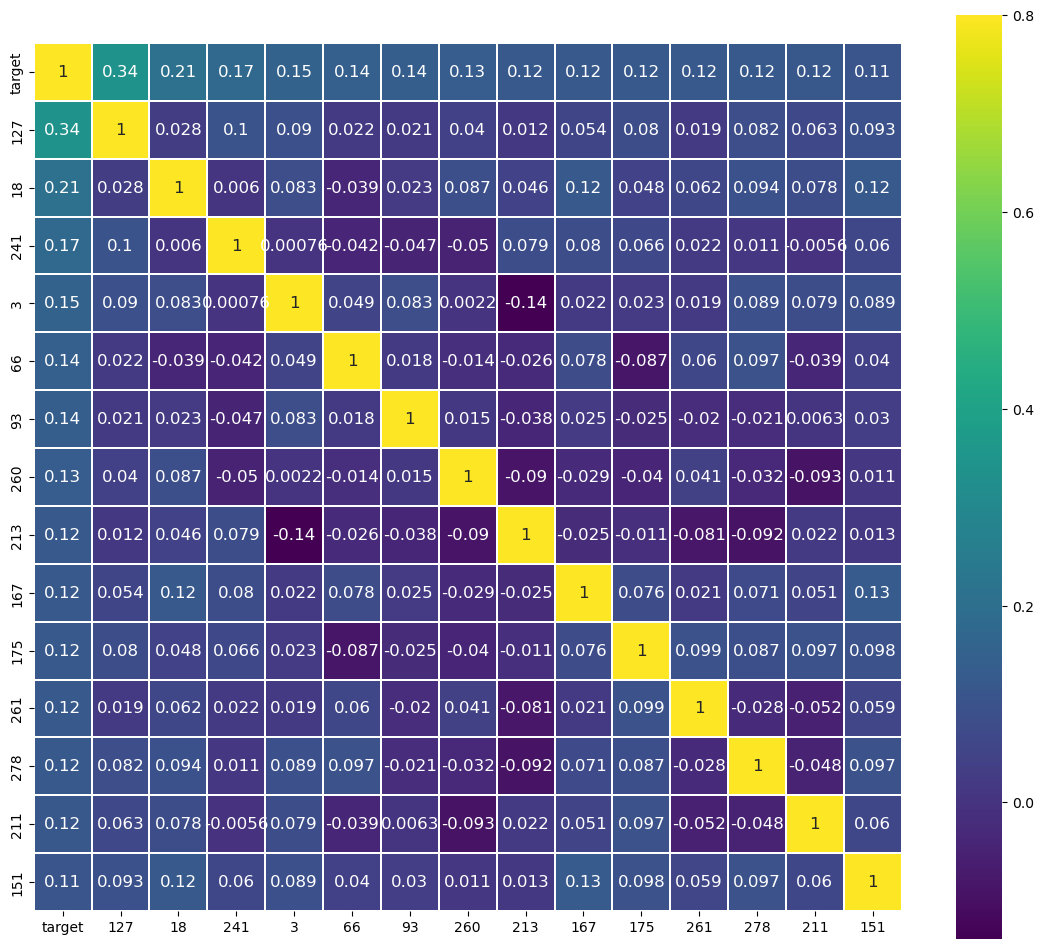

In [7]:
f , ax = plt.subplots(figsize = (14,12))

sns.heatmap(np.corrcoef(train[train.corr().nlargest(15, 'target')['target'].index].values.T), 
            vmax=.8, 
            linewidths=0.01, 
            square=True, 
            annot=True, 
            cmap='viridis',
            linecolor="white",
            xticklabels = train.corr().nlargest(15, 'target')['target'].index.values,
            annot_kws = {'size':12},
            yticklabels = train.corr().nlargest(15, 'target')['target'].index.values)

### Teste de Acurácia para Treinamentos

In [8]:
# Separando melhores colunas em novos data frames

df_train_x = train[list(train.corr().nlargest(15, 'target')['target'].index)[1:]]
df_train_y = train['target']

df_test_x  = test[list(train.corr().nlargest(15, 'target')['target'].index)[1:]]

In [9]:
# Normalizando dados

'''
O objetivo do MinMaxScaler é normalizar ou redimensionar as características  (ou variáveis) 
contínuas para um intervalo específico, como 0 e 1. Isso é feito para melhorar o desempenho 
dos algoritmos de aprendizado de máquina, que muitas vezes funcionam melhor quando as carac
terísticas estão na mesma escala.
'''

from sklearn.preprocessing import MinMaxScaler

# Dados de exemplo
data = df_train_x.columns

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar e transformar os dados
data_scaled = scaler.fit_transform(df_train_x)

# Transformando dados normalizados em data frame

scaled_df_train_x = pd.DataFrame(data_scaled, columns=data)

scaled_df_train_x.head(5)

,127,18,241,3,66,93,260,213,167,175,261,278,211,151
0,0.795947,0.421700,0.550931,0.596574,0.589857,0.922965,0.501684,0.637804,0.410788,0.619153,0.658881,0.561672,0.366523,0.619055
1,0.751492,0.263822,0.639913,0.727770,0.459745,0.836144,0.585419,0.417918,0.210433,0.232599,0.225508,0.427318,0.227919,0.514652
2,0.551367,0.583094,0.648236,0.334001,0.261336,0.502603,0.257942,0.265599,0.333136,0.638497,0.338262,0.628247,0.217830,0.102642
3,0.677034,0.351230,0.223345,0.554483,0.461595,0.793879,0.495242,0.319486,0.357834,0.160774,0.663922,0.811113,0.441118,0.643875
4,0.420829,0.566155,0.249306,0.462464,0.618730,0.555278,0.535354,0.465799,0.295594,0.392738,0.394892,0.489936,0.724115,0.516093


In [10]:
# Preparando dados para testar precisão do treinamento

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_df_train_x, df_train_y, test_size=0.2, random_state=42)

In [11]:
# Definindo diferentes métodos de treinamento de máquina para escolher o melhor

import xgboost as xgb

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Definindo biblioteca para calcular acurácia dos dados de treino

from sklearn.metrics import accuracy_score

# Definindo função de treinamento

def treinamento_de_modelos(modelo, x_t, y_t, x_tt, y_tt, resultado):
    
    inicio = time.time()
    
    # Treinando
    modelo.fit(x_t, y_t)
    
    # Prevendo
    y_pred = modelo.predict(x_tt)
    
    fim = time.time()
    
    # Resultados
    print(f'Modelo de treino: {str(modelo)}')
    
    if y_tt is not None:    
        print(f'Acurácia: {accuracy_score(y_tt, y_pred)}')
    
    print(f'Tempo de Processamento: {fim - inicio:.4f}s')
    
    if resultado == 1:
        return y_pred

In [12]:
# Definindo modelos de ML

models = [xgb.XGBClassifier(),
          LGBMClassifier(verbose=-1),
          RandomForestClassifier(),
          IsolationForest(n_jobs=-1),
          LogisticRegression(), 
          KNeighborsClassifier(), 
          SVC()]

# Treinando modelos

for model in models:
    
    # Treinando modelos
       
    treinamento_de_modelos(model, x_train, y_train, x_test, y_test, 0)
    
    if str(model) != 'SVC()':
        print('')

Modelo de treino: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acurácia: 0.82
Tempo de Processamento: 0.0370s

Modelo de treino: LGBMClassifier(verbose=-1)
Acurácia: 0.84
Tempo de Processamento: 0.1200s

Modelo de treino: RandomForestClassifier()
Acurácia: 0.84
Tempo de Processamento: 0.2310s

### Treinamento de Máquina

In [13]:
'''
Como o modelo de regressão logística foi o que obteve melhor desempenho, será ele o usado p
ara treinar os dados.
'''

# Treinando
resultados = treinamento_de_modelos(LogisticRegression(), df_train_x, df_train_y, df_test_x, None, 1)

# Criando DataFrame
df_resultados = pd.DataFrame({'id': test['id'], 'target': resultados})

# Mudando index
df_resultados.set_index('id', inplace=True)

Modelo de treino: LogisticRegression()
Tempo de Processamento: 0.0070s


In [14]:
df_resultados

,target
id,
250,0.0
251,0.0
252,0.0
253,1.0
254,1.0
...,...
19995,0.0
19996,0.0
19997,0.0


### Exportação de Resultados

In [15]:
df_resultados.to_csv('C:\\Users\\Estrela\\Desktop\\doii.csv', header=True)